## MACHINE LERANING ASSIGNMENT 1
## By Madan Surthani 
## Programming (70 points total)

## Download ‘Automobile’ dataset from the UCI ML repository (hCps://archive.ics.uci.edu/dataset/10/automobile)
## Create pandas dataset with the following columns: Features Target (Response) X1 X2 X3 X4 X5 Y wheel-base compressionratio engine-size length width city-mpg Use the last row (row 3) for the column names.
## (5 point) Designate the first 60% of data as a training set, the next 20% as a valida3on set, and the last 20% as a test set. You can keep column Y as a part of dataset or separate it into a stand-alone vector.
## (10 point) Consider three linear models for the regression problem – linear regression, ridge regression, and LASSO. Fit them with default parameters on the training set and es3mate performance on both valida3on and test sets. Use MSE, Pearson Correla3on Coefficient (PCC), and Coefficient of determina3on (R2 ) metrics.
## (20 point) For ridge regression and LASSO inves3gate the following values of parameter alpha (mul3plica3on coefficient for regulariza3on) on the valida3on set and its effect on model performance: [0., 0.25, 0.5, 1., 1000.]. Which value gives the best performance on the valida3on set? Retrain the model with this value and calculate the same metrics on the test set.
## (5 point) Apply Scikit-Learn func3on PolynomialFeatures to the feature part of the dataset (columns X1- X5), use the degree 5. Column Y should not be transformed!
## (20 point) Repeat experiments in sec3on 5.
## (10 point) Analyze coefficients of Ridge regression and LASSO models. What is the most important feature (a feature having the largest weight)? Which features have weights close to zero?
## Implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
data = pd.read_csv(r"C:\Users\smkon\Downloads\archive\Automobile_data.csv")

In [67]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [68]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [69]:
df=df[["wheel-base","compression-ratio","engine-size","length","width","city-mpg"]]

In [70]:
df

,wheel-base,compression-ratio,engine-size,length,width,city-mpg
0,88.6,9.0,130,168.8,64.1,21
1,88.6,9.0,130,168.8,64.1,21
2,94.5,9.0,152,171.2,65.5,19
3,99.8,10.0,109,176.6,66.2,24
4,99.4,8.0,136,176.6,66.4,18
...,...,...,...,...,...,...
200,109.1,9.5,141,188.8,68.9,23
201,109.1,8.7,141,188.8,68.8,19
202,109.1,8.8,173,188.8,68.9,18
203,109.1,23.0,145,188.8,68.9,26


### Scatter plot of the label and feature 

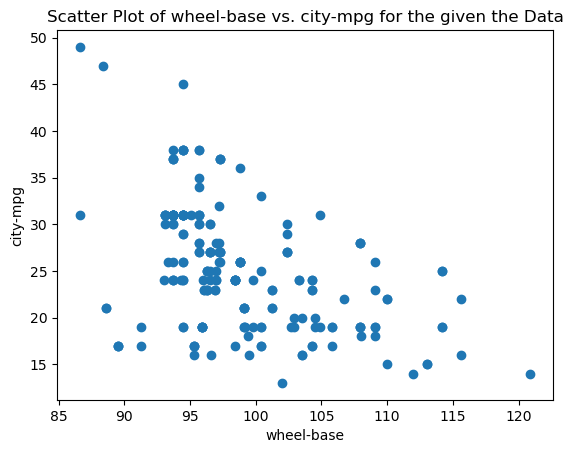

In [71]:
plt.scatter(df['wheel-base'], df['city-mpg'])
plt.xlabel('wheel-base')
plt.ylabel('city-mpg')
plt.title('Scatter Plot of wheel-base vs. city-mpg for the given the Data')
plt.show()

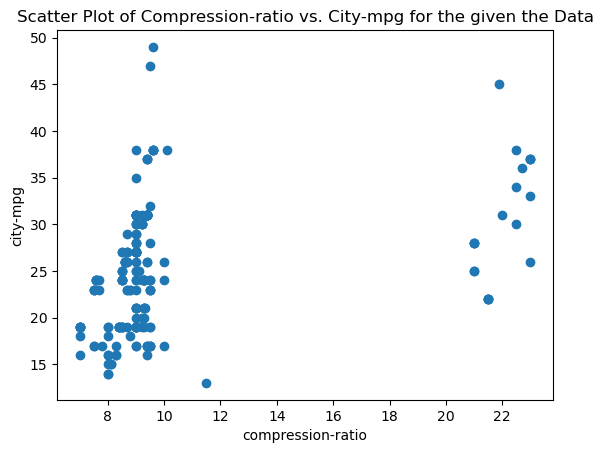

In [72]:
plt.scatter(df['compression-ratio'], df['city-mpg'])
plt.xlabel('compression-ratio')
plt.ylabel('city-mpg')
plt.title('Scatter Plot of Compression-ratio vs. City-mpg for the given the Data')
plt.show()

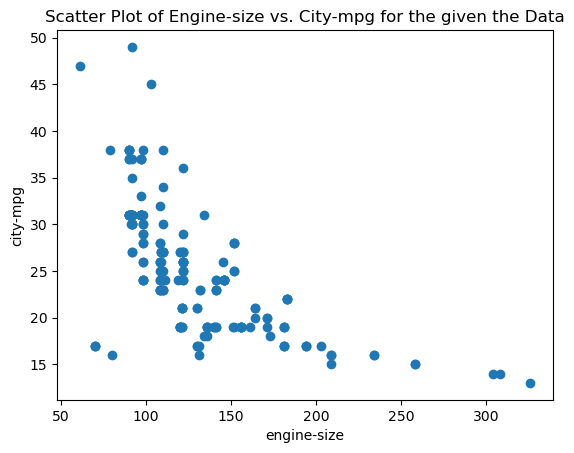

In [73]:
plt.scatter(df['engine-size'], df['city-mpg'])
plt.xlabel('engine-size')
plt.ylabel('city-mpg')
plt.title('Scatter Plot of Engine-size vs. City-mpg for the given the Data')
plt.show()

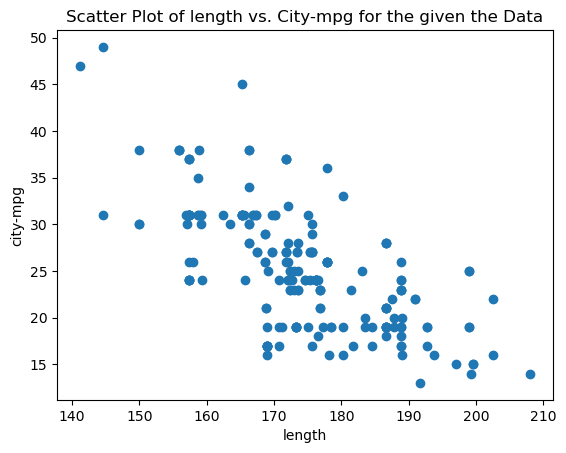

In [74]:
plt.scatter(df['length'], df['city-mpg'])
plt.xlabel('length')
plt.ylabel('city-mpg')
plt.title('Scatter Plot of length vs. City-mpg for the given the Data')
plt.show()

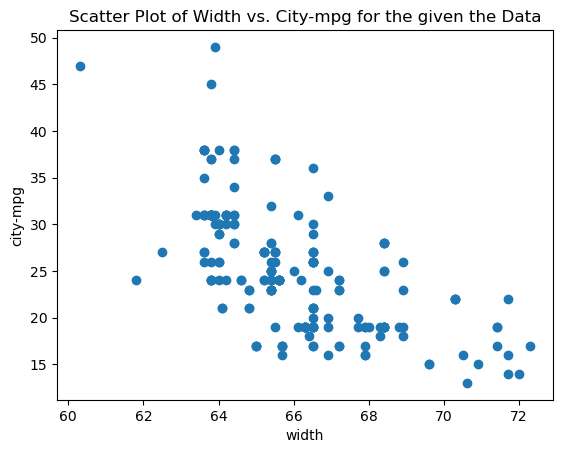

In [75]:
plt.scatter(df['width'], df['city-mpg'])
plt.xlabel('width')
plt.ylabel('city-mpg')
plt.title('Scatter Plot of Width vs. City-mpg for the given the Data')
plt.show()

## Spliting the Data

In [76]:
Y_data= df['city-mpg']

In [77]:
Y_data

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [78]:
X_data= df.drop('city-mpg', axis=1)

In [79]:
X_data

,wheel-base,compression-ratio,engine-size,length,width
0,88.6,9.0,130,168.8,64.1
1,88.6,9.0,130,168.8,64.1
2,94.5,9.0,152,171.2,65.5
3,99.8,10.0,109,176.6,66.2
4,99.4,8.0,136,176.6,66.4
...,...,...,...,...,...
200,109.1,9.5,141,188.8,68.9
201,109.1,8.7,141,188.8,68.8
202,109.1,8.8,173,188.8,68.9
203,109.1,23.0,145,188.8,68.9


In [80]:
X_train, X_valTest, Y_train, Y_valTest = train_test_split(X_data, Y_data, test_size=0.4, random_state=42)


#Here we have splitted the X_data And Y_data into the train and test(validation + test):

#X_train : Features for training (60% of the original data)

#X_valTest : Features for Testing and Validation (40% of the original data)

#Y_train : Features for training (60% of the original data)

#Y_valTest : Features for Testing and Validation (40% of the original data)

In [81]:
X_validation, X_test, Y_validation, Y_test = train_test_split(X_valTest, Y_valTest, test_size=0.5, random_state=42)

#we have use 0.5 as test size in the later split beacuse it is perform in the valTest Data
#X_validation : Features for validation (20% of the original data)

#X_test: Features for testing (20% of the original data)

#Y_validation: Features for validation (20% of the original data)

#Y_test : Features for testing (20% of the original data)

# Step 3
# Perparing Model

In [82]:
# Creating lodel object
linear_reg = LinearRegression()

# fitting the Data 
linear_reg.fit(X_train, Y_train)

#Predicting for validation data
Y_val_pred_linear = linear_reg.predict(X_validation)

#finding Mean Square Error(MSE) for validation  data set
mse_linear = mean_squared_error(Y_validation, Y_val_pred_linear)

# Finding Pearson Correlation Pearson coefficient (PCC) for validation Data Set 
pcc_linear = np.corrcoef(Y_validation, Y_val_pred_linear)[0, 1]

# Finding Coefficient of determina3on (R2) metrics
r2_linear = r2_score(Y_validation, Y_val_pred_linear)


# Repeating Same performance for test Data Set 

#fiitiing the Test Data
Y_test_pred_linear = linear_reg.predict(X_test)

#Predicting for Test data
mse_linear_test = mean_squared_error(Y_test, Y_test_pred_linear)

#finding Mean Square Error(MSE) for Test  data set
pcc_linear_test = np.corrcoef(Y_test, Y_test_pred_linear)[0, 1]

# Finding Coefficient of determina3on (R2) metrics for Test DataSet
r2_linear_test = r2_score(Y_test, Y_test_pred_linear)

# Printing 
print("For  Validation Set:")
print(f"Linear Regression - MSE: {mse_linear}, PCC: {pcc_linear}, R2: {r2_linear}")
print("\nFor Test Set:")
print(f"Linear Regression - MSE: {mse_linear_test}, PCC: {pcc_linear_test}, R2: {r2_linear_test}")

For  Validation Set:
Linear Regression - MSE: 20.29514004998871, PCC: 0.8227098068087261, R2: 0.6657968062534921

For Test Set:
Linear Regression - MSE: 10.539190179156172, PCC: 0.8760184188938201, R2: 0.7297272510883062


## Doing same for Ridge and Lasso regression

In [83]:
# Ridge Regression
ridge_reg = Ridge()

# For validation
ridge_reg.fit(X_train, Y_train)
Y_val_pred_ridge = ridge_reg.predict(X_validation)
mse_ridge = mean_squared_error(Y_validation, Y_val_pred_ridge)
pcc_ridge = np.corrcoef(Y_validation, Y_val_pred_ridge)[0, 1]
r2_ridge = r2_score(Y_validation, Y_val_pred_ridge)


# For test set

Y_test_pred_ridge = ridge_reg.predict(X_test)
mse_ridge_test = mean_squared_error(Y_test, Y_test_pred_ridge)
pcc_ridge_test = np.corrcoef(Y_test, Y_test_pred_ridge)[0, 1]
r2_ridge_test = r2_score(Y_test, Y_test_pred_ridge)


# Printing
print(" Ridge Model ")
print("Performance on Validation Set:")
print(f"Ridge Regression - MSE: {mse_ridge}, PCC: {pcc_ridge}, R2: {r2_ridge}")


print("\nPerformance on Test Set:")
print(f"Ridge Regression - MSE: {mse_ridge_test}, PCC: {pcc_ridge_test}, R2: {r2_ridge_test}")


 Ridge Model 
Performance on Validation Set:
Ridge Regression - MSE: 20.305135742307034, PCC: 0.8226083400357304, R2: 0.665632205650182

Performance on Test Set:
Ridge Regression - MSE: 10.5442843403186, PCC: 0.8759572745965998, R2: 0.7295966136372911


In [84]:
#Lasso Regression
lasso_reg = Lasso()

# For validation
lasso_reg.fit(X_train, Y_train)
Y_val_pred_lasso = lasso_reg.predict(X_validation)
mse_lasso = mean_squared_error(Y_validation, Y_val_pred_lasso)
pcc_lasso = np.corrcoef(Y_validation, Y_val_pred_lasso)[0, 1]
r2_lasso = r2_score(Y_validation, Y_val_pred_lasso)

# For Test 
Y_test_pred_lasso = lasso_reg.predict(X_test)
mse_lasso_test = mean_squared_error(Y_test, Y_test_pred_lasso)
pcc_lasso_test = np.corrcoef(Y_test, Y_test_pred_lasso)[0, 1]
r2_lasso_test = r2_score(Y_test, Y_test_pred_lasso)


#Printing 
print("Performance on Validation Set:")
print(f"LASSO Regression - MSE: {mse_lasso}, PCC: {pcc_lasso}, R2: {r2_lasso}")

print("\nPerformance on Test Set:")
print(f"LASSO Regression - MSE: {mse_lasso_test}, PCC: {pcc_lasso_test}, R2: {r2_lasso_test}")

Performance on Validation Set:
LASSO Regression - MSE: 23.003530478784842, PCC: 0.794936813188792, R2: 0.6211973243584832

Performance on Test Set:
LASSO Regression - MSE: 11.49450217598491, PCC: 0.8667530890574933, R2: 0.705228708499914


## rying with different Alpha Values

In [85]:
alpha_values = [0.0, 0.25, 0.5, 1.0, 1000.0]

## Ridge Model

In [86]:
best_alpha = None
best_valid_score = float('inf')  
for alpha in alpha_values:
    # Traing the model 
    ridge_model = Ridge(alpha=alpha)
    ridge_cv_scores = cross_val_score(ridge_model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -ridge_cv_scores.mean()
    
    # Predicting and Checking
    ridge_model.fit(X_train, Y_train)
    Y_valid_pred = ridge_model.predict(X_validation)
    valid_mse = mean_squared_error(Y_validation, Y_valid_pred)
    
    # Check for best Value of Aplha
    if valid_mse < best_valid_score:
        best_valid_score = valid_mse
        best_alpha = alpha
    print("alpha:", alpha)
    print(f"Validation result on Alpha value {alpha} with  MSE  :", valid_mse)
    

# Predicting for the combine Data
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(np.concatenate((X_train, X_validation)), np.concatenate((Y_train,Y_validation)))

# test set
Y_test_pred = best_ridge_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("\n")

print("So the final value for the best alpha in Ridge Model is : ")
print("Best alpha:", best_alpha)
print("Validation MSE with best alpha:", best_valid_score)
print("Test MSE with best alpha:", test_mse)

alpha: 0.0
Validation result on Alpha value 0.0 with  MSE  : 20.295140049988724
alpha: 0.25
Validation result on Alpha value 0.25 with  MSE  : 20.297643851825523
alpha: 0.5
Validation result on Alpha value 0.5 with  MSE  : 20.30014439396185
alpha: 1.0
Validation result on Alpha value 1.0 with  MSE  : 20.305135742307034
alpha: 1000.0
Validation result on Alpha value 1000.0 with  MSE  : 25.622776599053267


So the final value for the best alpha in Ridge Model is : 
Best alpha: 0.0
Validation MSE with best alpha: 20.295140049988724
Test MSE with best alpha: 10.85888268857027


## Lasso Model

In [87]:
# Repeating same for Lssso Regression
best_alpha_LASSO= None
best_valid_score_LASSO = float('inf')

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_cv_scores = cross_val_score(lasso_model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -lasso_cv_scores.mean()
    
    
    lasso_model.fit(X_train, Y_train)
    Y_valid_pred = lasso_model.predict(X_validation)
    valid_mse = mean_squared_error(Y_validation, Y_valid_pred)
    
    
    if valid_mse < best_valid_score_LASSO:
        best_valid_score_LASSO = valid_mse
        best_alpha_LASSO = alpha
    print("alpha:", alpha)
    print(f"Validation result on Alpha value {alpha} with  MSE  :", valid_mse)
    
        


best_lasso_model = Lasso(alpha=best_alpha_LASSO)
best_lasso_model.fit(np.concatenate((X_train, X_validation)), np.concatenate((Y_train,Y_validation)))


Y_test_pred = best_lasso_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)


print("\n")
print("So the final value for the best alpha in Lasso Model is : ")
print("Best alpha:", best_alpha_LASSO)
print("Validation MSE with best alpha:", best_valid_score_LASSO)
print("Test MSE with best alpha:", test_mse)
    


alpha: 0.0
Validation result on Alpha value 0.0 with  MSE  : 20.295140049988714
alpha: 0.25
Validation result on Alpha value 0.25 with  MSE  : 20.98406408200769
alpha: 0.5
Validation result on Alpha value 0.5 with  MSE  : 21.78576122948501
alpha: 1.0
Validation result on Alpha value 1.0 with  MSE  : 23.003530478784842
alpha: 1000.0
Validation result on Alpha value 1000.0 with  MSE  : 64.92444973230221


So the final value for the best alpha in Lasso Model is : 
Best alpha: 0.0
Validation MSE with best alpha: 20.295140049988714
Test MSE with best alpha: 10.858882688570317


## Polynomial Feature 

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:

poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.fit_transform(X_validation)
X_test_poly = poly.fit_transform(X_test)

# Repeating the process
# For Every alpha value that are given
# Ridge Model

In [90]:
best_alpha = None
best_valid_score = float('inf')  # Initialize with a large value
for alpha in alpha_values:
   
    ridge_model = Ridge(alpha=alpha)
    ridge_cv_scores = cross_val_score(ridge_model, X_train_poly, Y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -ridge_cv_scores.mean()
    
    
    ridge_model.fit(X_train_poly, Y_train)
    Y_valid_pred = ridge_model.predict(X_valid_poly)
    valid_mse = mean_squared_error(Y_validation, Y_valid_pred)
    
  
    if valid_mse < best_valid_score:
        best_valid_score = valid_mse
        best_alpha = alpha
    print("alpha:", alpha)
    print(f"Validation result on Alpha value {alpha} with  MSE  :", valid_mse)


best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(np.concatenate((X_train_poly, X_valid_poly)), np.concatenate((Y_train,Y_validation)))


Y_test_pred = best_ridge_model.predict(X_test_poly)
test_mse = mean_squared_error(Y_test, Y_test_pred)


print("\n")
print("So the final value for the best alpha in  Ridge Model is : ")
print("Best alpha:", best_alpha)
print("Validation MSE with best alpha:", best_valid_score)
print("Test MSE with best alpha:", test_mse)

alpha: 0.0
Validation result on Alpha value 0.0 with  MSE  : 1553.3105913452375
alpha: 0.25
Validation result on Alpha value 0.25 with  MSE  : 1553.3105913452375
alpha: 0.5
Validation result on Alpha value 0.5 with  MSE  : 1553.3105913452375
alpha: 1.0
Validation result on Alpha value 1.0 with  MSE  : 1553.3105913452375
alpha: 1000.0
Validation result on Alpha value 1000.0 with  MSE  : 1553.3105913452375


So the final value for the best alpha in  Ridge Model is : 
Best alpha: 0.0
Validation MSE with best alpha: 1553.3105913452375
Test MSE with best alpha: 3079.0754805211973


## Lasso Model

In [91]:
best_alpha_LASSO= None
best_valid_score_LASSO = float('inf')# Initialize with a large value

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_cv_scores = cross_val_score(lasso_model, X_train_poly, Y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = -lasso_cv_scores.mean()
    
    
    lasso_model.fit(X_train_poly, Y_train)
    Y_valid_pred = lasso_model.predict(X_valid_poly)
    valid_mse = mean_squared_error(Y_validation, Y_valid_pred)
    print("Alpha:", alpha)
    print("Validation Mean Square  Error with  alpha:", valid_mse)
    
    
    # Check if this alpha is the best so far
    if valid_mse < best_valid_score_LASSO:
        best_valid_score_LASSO = valid_mse
        best_alpha_LASSO= alpha
        

# Step 5: Retrain the model on the combined training and validation set
best_lasso_model = Lasso(alpha=best_alpha_LASSO)
best_lasso_model.fit(np.concatenate((X_train_poly, X_valid_poly)), np.concatenate((Y_train,Y_validation)))

# Step 6: Evaluate on the test set
Y_test_pred = best_lasso_model.predict(X_test_poly)
test_mse = mean_squared_error(Y_test, Y_test_pred)



print("\n")
print("So the final value for the best alpha in Lasso Model is : ")
print("\n")
print("Best alpha:", best_alpha_LASSO)
print("Validation MSE with best alpha:", best_valid_score_LASSO)
print("Test MSE with best alpha:", test_mse)
    


Alpha: 0.0
Validation Mean Square  Error with  alpha: 13.740645734851993
Alpha: 0.25
Validation Mean Square  Error with  alpha: 14.01381271175181
Alpha: 0.5
Validation Mean Square  Error with  alpha: 14.119072739606525
Alpha: 1.0
Validation Mean Square  Error with  alpha: 14.418779900815553
Alpha: 1000.0
Validation Mean Square  Error with  alpha: 16.878665637037695


So the final value for the best alpha in Lasso Model is : 


Best alpha: 0.0
Validation MSE with best alpha: 13.740645734851993
Test MSE with best alpha: 5.81372901090624


## Coefficient of Model

In [92]:
X_train, X_valTest, Y_train, Y_valTest = train_test_split(X_data, Y_data, test_size=0.4, random_state=42)

In [93]:
X_validation, X_test, Y_validation, Y_test = train_test_split(X_valTest, Y_valTest, test_size=0.5, random_state=42)

In [94]:
import pandas as pd

ridge_coefficients = []
lasso_coefficients = []


for a in alpha_values:
   
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, Y_train)
    ridge_coef = ridge.coef_
    ridge_coefficients.append([a] + list(ridge_coef))
    
  
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, Y_train)
    lasso_coef = lasso.coef_
    lasso_coefficients.append([a] + list(lasso_coef))

    
ridge_coef_df = pd.DataFrame(ridge_coefficients, columns=["Alpha ", 'wheel-base' ,'compression-ratio','engine-size', 'length', 'width',])
lasso_coef_df = pd.DataFrame(lasso_coefficients, columns=["Alpha ", 'wheel-base' ,'compression-ratio','engine-size', 'length', 'width'])

print("\n")
print("Ridge Coefficients:")

print(ridge_coef_df)

print("\n")
print("\nLasso Coefficients:")

print(lasso_coef_df)




Ridge Coefficients:
    Alpha   wheel-base  compression-ratio  engine-size    length     width
0     0.00    0.331261           0.643306    -0.037816 -0.332261 -0.554393
1     0.25    0.331068           0.643208    -0.037837 -0.332268 -0.553427
2     0.50    0.330876           0.643110    -0.037857 -0.332275 -0.552465
3     1.00    0.330493           0.642913    -0.037897 -0.332288 -0.550551
4  1000.00    0.118173           0.407451    -0.055996 -0.244275 -0.072034



Lasso Coefficients:
    Alpha   wheel-base  compression-ratio  engine-size    length     width
0     0.00    0.331261           0.643306    -0.037816 -0.332261 -0.554393
1     0.25    0.270937           0.626511    -0.042443 -0.325355 -0.340766
2     0.50    0.210682           0.609709    -0.047070 -0.318509 -0.127016
3     1.00    0.120735           0.579928    -0.051337 -0.283772 -0.000000
4  1000.00   -0.000000           0.000000    -0.000000 -0.000000 -0.000000
